## Introduction

In this report I will aim to discover some hidden insights in data provided by Walmart. Some potential questions retail stores might ask about are highest performing stores and months. Busiest periods for sales in store. As well as how temperature has affected purchasing decisions. This dataset also has a fuel price and CPI (Customer price index). Although no obvious observations can be made using these two currently, I aim to use these two columns to hopefully provide some meaninful data to the proposed stakeholder.

## Table of contents

## Glossary

<p><span style="font-weight: bold">Store: </span>..</p>
<p><span style="font-weight: bold">Date: </span>..</p>
<p><span style="font-weight: bold">Weekly_Sales: </span>..</p>
<p><span style="font-weight: bold">Holiday_Flag: </span>..</p>
<p><span style="font-weight: bold">Temperature: </span>..</p>
<p><span style="font-weight: bold">Fuel_Price: </span>..</p>
<p><span style="font-weight: bold">CPI: </span>..</p>
<p><span style="font-weight: bold">Unemployment: </span>..</p>

In [3]:
import pandas as pd
import os
import datetime

Importing required libraries needed for the immediate analysis

In [4]:
all_data = pd.read_csv("archive/Walmart.csv")
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Adding a month column so we can find out the busiest month, it will likely be December given the state of holidays in America. However, we can dig deeper after we find do some initial digging.

In [5]:
all_data['Date'] = pd.to_datetime(all_data['Date'], dayfirst=True)
all_data['Month'] = all_data['Date'].dt.month
all_data['Week'] = all_data['Date'].dt.isocalendar().week

# all_data = all_data.drop(columns='Hour')

In [6]:
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,9


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's start to dig into the data.

## Question 1: Which store had had the highest sales?

In [19]:
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,9


In [21]:
highest_sales = all_data.groupby('Store').sum()
highest_sales = highest_sales.reset_index('Store',drop=False)
highest_sales.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,1,2.224028e+08,10,9767.87,460.417,30887.555523,1088.290,922,3692
1,2,2.753824e+08,10,9754.94,460.417,30837.422420,1090.210,922,3692
2,3,5.758674e+07,10,10215.09,460.417,31372.988971,1026.309,922,3692
3,4,2.995440e+08,10,8902.23,460.027,18401.192733,852.951,922,3692
4,5,4.547569e+07,10,9925.65,460.417,30968.878137,900.243,922,3692


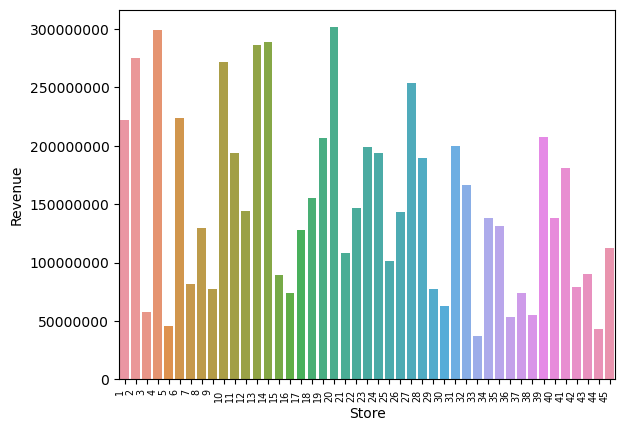

In [47]:
highest_sales_bar = sns.barplot(x=highest_sales['Store'], y=highest_sales['Weekly_Sales'])
highest_sales_bar.set_xticklabels(highest_sales_bar.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='x-small')
highest_sales_bar.set_xlabel('Store')
highest_sales_bar.set_ylabel('Revenue')
highest_sales_bar.ticklabel_format(style='plain', axis='y',useOffset=False)

## Question 2: Which month is typically the most profitable?

In [55]:
best_month = all_data.groupby('Month').sum()
best_month = best_month.reset_index('Month',drop=False)
best_month.head(12).sort_values('Weekly_Sales', ascending=True)

,Month,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,8280,3.325984e+08,0,13537.81,1166.815,61750.705353,2843.916,900
10,11,8280,4.130157e+08,90,17966.08,1146.490,61534.794417,2930.312,16380
4,5,12420,5.571256e+08,0,35349.25,1931.677,92634.154613,4332.128,10530
1,2,12420,5.687279e+08,135,21006.49,1691.791,92167.711723,4395.392,3510
11,12,10350,5.768386e+08,90,18081.11,1421.690,76997.052681,3662.890,22500
8,9,13455,5.787612e+08,135,42363.41,2008.122,100756.446368,4641.799,21645
9,10,13455,5.847848e+08,0,36013.60,1959.510,100815.777294,4563.368,24165
2,3,13455,5.927859e+08,0,29145.86,1994.057,100292.699633,4733.267,6255
7,8,13455,6.130902e+08,0,46375.18,1996.366,100768.602226,4603.092,19125
5,6,13455,6.226299e+08,0,43996.74,2001.901,100572.514257,4666.007,13860


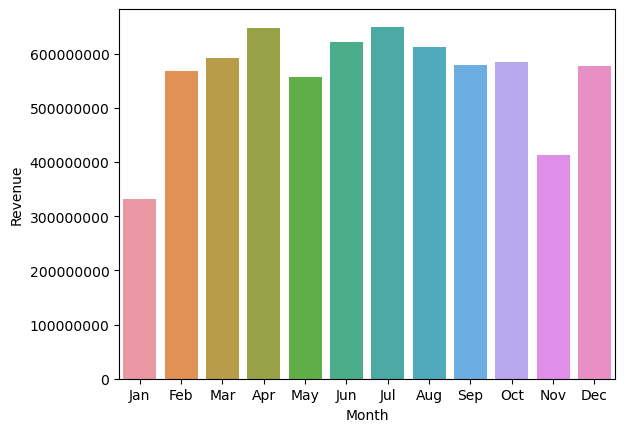

In [61]:
month_num = range(1, 13)
months = []

for i in month_num:
    i = str(i)
    datetime_obect = datetime.datetime.strptime(i, "%m")
    month_name = datetime_obect.strftime('%b')
    months.append(month_name)


best_month_bar = sns.barplot(x=months, y=best_month['Weekly_Sales'])
best_month_bar.set_xlabel('Month')
best_month_bar.set_ylabel('Revenue')
best_month_bar.ticklabel_format(style='plain', axis='y',useOffset=False)

Now we know that July is the most profitable month. Perhaps we should see if there is a correlation between sales and factors such as CPI, Unemployment, Fuel prices or Temperature? 

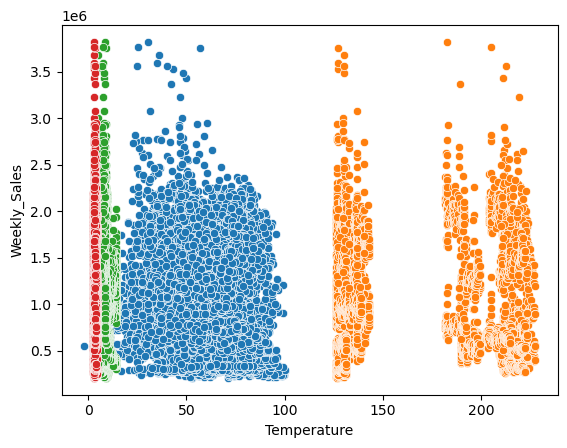

In [69]:
temperature_sales = sns.scatterplot(x=all_data['Temperature'], y=all_data['Weekly_Sales'])
cpi_sales = sns.scatterplot(x=all_data['CPI'], y=all_data['Weekly_Sales'])
unemployment_sales = sns.scatterplot(x=all_data['Unemployment'], y=all_data['Weekly_Sales'])
fuelprice_sales = sns.scatterplot(x=all_data['Fuel_Price'], y=all_data['Weekly_Sales'])

Well, that certainly is interesting. I suppose we should do something with our monstrosity of a scatterplot? For now, lets view them individually. We can use these as vectors when we build our model later on. 

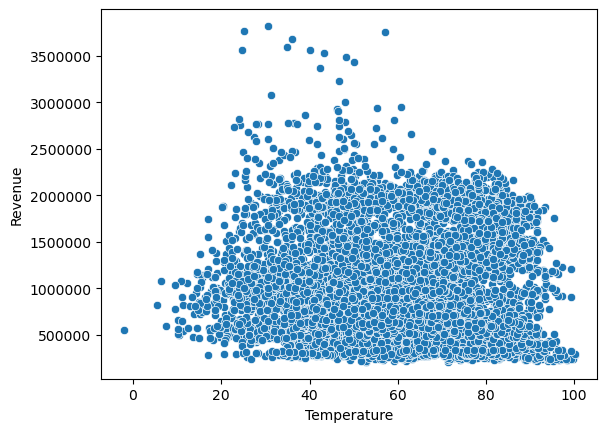

In [75]:
temperature_sales = sns.scatterplot(x=all_data['Temperature'], y=all_data['Weekly_Sales'])
temperature_sales.set_xlabel('Temperature')
temperature_sales.set_ylabel('Revenue')
temperature_sales.ticklabel_format(style='plain', axis='y',useOffset=False)

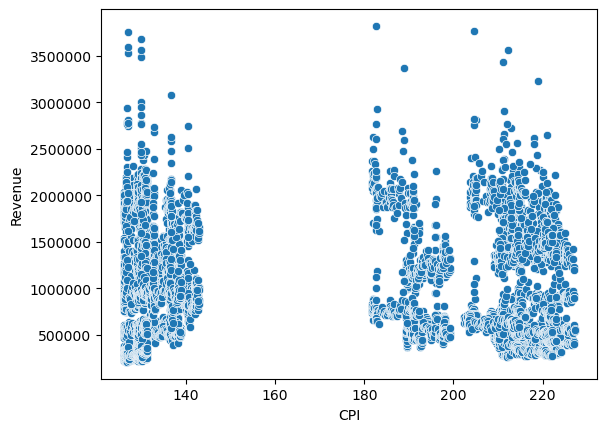

In [76]:
cpi_sales = sns.scatterplot(x=all_data['CPI'], y=all_data['Weekly_Sales'])
cpi_sales.set_xlabel('CPI')
cpi_sales.set_ylabel('Revenue')
cpi_sales.ticklabel_format(style='plain', axis='y',useOffset=False)

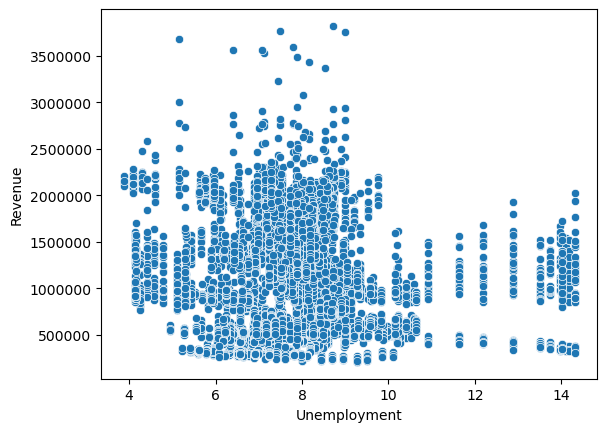

In [77]:
unemployment_sales = sns.scatterplot(x=all_data['Unemployment'], y=all_data['Weekly_Sales'])
unemployment_sales.set_xlabel('Unemployment')
unemployment_sales.set_ylabel('Revenue')
unemployment_sales.ticklabel_format(style='plain', axis='y',useOffset=False)

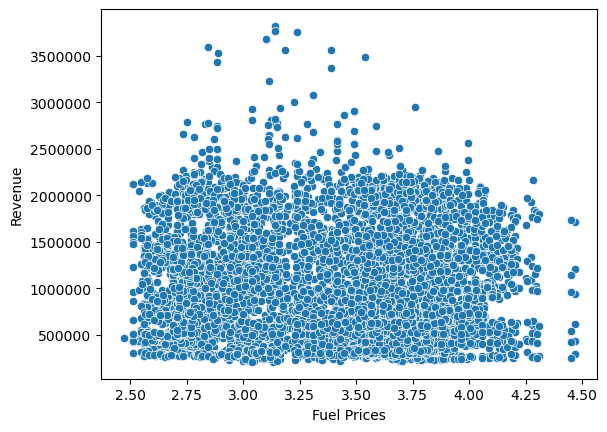

In [83]:
fuelprice_sales = sns.scatterplot(x=all_data['Fuel_Price'], y=all_data['Weekly_Sales'])
fuelprice_sales.set_xlabel('Fuel Prices')
fuelprice_sales.set_ylabel('Revenue')
fuelprice_sales.ticklabel_format(style='plain', axis='y',useOffset=True)
